#                                    CHALLENGE PROJECT

###                                                  PRE-PROCESSING

Data Loading and Observation

In [1]:

import os
import gzip
import io
import pandas as pd
folder_path = 'Extracted'
files_list= [os.listdir(folder_path)]
number_of_Lines=10
# print(len(files_list))
# length of csv files in each .gz file
csv_file_lengths=[len(file[j]) for file in files_list for j in range(len(file))]
print(csv_file_lengths)




[59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59]


In [2]:
#read all files as csv in a list 
all_csv_list = [pd.read_csv("Extracted/{file}".format(file=file[i]),
                            compression='gzip', header=0, sep=',', quotechar='"') for file in files_list for i in range(len(file))]
# print(len(all_csv_list))
print(type(all_csv_list[1]))



<class 'pandas.core.frame.DataFrame'>


In [3]:
#let's make sure the files have the same columns
print(pd.DataFrame([i.columns for i in all_csv_list]).nunique(1).eq(1).all())
all([len(all_csv_list[0].columns.intersection(df.columns)) 
      == all_csv_list[0].shape[1] for df in all_csv_list])

False


True

In [4]:
#merge all in one dataframe and read some lines
df = pd.concat(all_csv_list, axis=0)
for i in range(len(df.columns)): 
    print(i,df.columns[i])

print(df.describe())
#get colums with nulls if any
df.isnull().sum()

0 timestamp
1 raw_acc:magnitude_stats:mean
2 raw_acc:magnitude_stats:std
3 raw_acc:magnitude_stats:moment3
4 raw_acc:magnitude_stats:moment4
5 raw_acc:magnitude_stats:percentile25
6 raw_acc:magnitude_stats:percentile50
7 raw_acc:magnitude_stats:percentile75
8 raw_acc:magnitude_stats:value_entropy
9 raw_acc:magnitude_stats:time_entropy
10 raw_acc:magnitude_spectrum:log_energy_band0
11 raw_acc:magnitude_spectrum:log_energy_band1
12 raw_acc:magnitude_spectrum:log_energy_band2
13 raw_acc:magnitude_spectrum:log_energy_band3
14 raw_acc:magnitude_spectrum:log_energy_band4
15 raw_acc:magnitude_spectrum:spectral_entropy
16 raw_acc:magnitude_autocorrelation:period
17 raw_acc:magnitude_autocorrelation:normalized_ac
18 raw_acc:3d:mean_x
19 raw_acc:3d:mean_y
20 raw_acc:3d:mean_z
21 raw_acc:3d:std_x
22 raw_acc:3d:std_y
23 raw_acc:3d:std_z
24 raw_acc:3d:ro_xy
25 raw_acc:3d:ro_xz
26 raw_acc:3d:ro_yz
27 proc_gyro:magnitude_stats:mean
28 proc_gyro:magnitude_stats:std
29 proc_gyro:magnitude_stats:moment3

          timestamp  raw_acc:magnitude_stats:mean  \
count  3.773460e+05                 377056.000000   
mean   1.445839e+09                      1.002223   
std    5.907009e+06                      0.079623   
min    1.433537e+09                      0.018148   
25%    1.441438e+09                      0.992556   
50%    1.444974e+09                      1.001258   
75%    1.448696e+09                      1.012745   
max    1.464899e+09                      3.185837   

       raw_acc:magnitude_stats:std  raw_acc:magnitude_stats:moment3  \
count                377056.000000                    377056.000000   
mean                      0.038832                         0.037772   
std                       0.096109                         0.113198   
min                       0.000030                        -0.493806   
25%                       0.001709                        -0.000785   
50%                       0.003265                         0.000772   
75%                      

timestamp                               0
raw_acc:magnitude_stats:mean          290
raw_acc:magnitude_stats:std           290
raw_acc:magnitude_stats:moment3       290
raw_acc:magnitude_stats:moment4       290
                                    ...  
label:PHONE_IN_BAG                 284884
label:PHONE_ON_TABLE               214923
label:WITH_CO-WORKERS              265282
label:WITH_FRIENDS                 211932
label_source                            0
Length: 278, dtype: int64

As shown above, there are quite a number of columns(278) and so it will be better to analyse related colums(based on type sensor) separately in order to easily identify the appropriate processing technicques for group

Analyse label data first 

In [5]:
label_df = df.loc[:, df.columns.str.startswith('label') ] 
print(label_df.head(5))
label_df.isnull().sum()

   label:LYING_DOWN  label:SITTING  label:FIX_walking  label:FIX_running  \
0               0.0            1.0                0.0                NaN   
1               0.0            1.0                0.0                NaN   
2               0.0            1.0                0.0                NaN   
3               0.0            1.0                0.0                NaN   
4               0.0            1.0                0.0                NaN   

   label:BICYCLING  label:SLEEPING  label:LAB_WORK  label:IN_CLASS  \
0              NaN             0.0             NaN             0.0   
1              NaN             0.0             NaN             0.0   
2              NaN             0.0             NaN             0.0   
3              NaN             0.0             NaN             0.0   
4              NaN             0.0             NaN             0.0   

   label:IN_A_MEETING  label:LOC_main_workplace  ...  \
0                 1.0                       1.0  ...   
1         

label:LYING_DOWN                  73623
label:SITTING                     70752
label:FIX_walking                 70752
label:FIX_running                236476
label:BICYCLING                  242163
label:SLEEPING                    92078
label:LAB_WORK                   327951
label:IN_CLASS                   268283
label:IN_A_MEETING               146133
label:LOC_main_workplace         175619
label:OR_indoors                 180540
label:OR_outside                 225848
label:IN_A_CAR                   202650
label:ON_A_BUS                   208314
label:DRIVE_-_I_M_THE_DRIVER     215082
label:DRIVE_-_I_M_A_PASSENGER    246259
label:LOC_home                    22012
label:FIX_restaurant             219764
label:PHONE_IN_POCKET            242982
label:OR_exercise                136509
label:COOKING                    168000
label:SHOPPING                   238553
label:STROLLING                  323585
label:DRINKING__ALCOHOL_         306563
label:BATHING_-_SHOWER           176226


There are huge missing labels in some columns. the absence of labels is a significant practical problem in machine learning. Not withstanding the fact that we can use semi-supervised learning methods to handle these type of situations, I think we can simple drop those columns which have those hign null values and drop rows associated with columns which have lesser null values, especially when we will be focusing on few labels that represent the activity of the phone user.

In [6]:
#dropping higher nul value columns
label_df=label_df.dropna(thresh=len(label_df) - 92500, axis=1)
print(len(label_df.columns))
label_df.isnull().sum()

8


label:LYING_DOWN     73623
label:SITTING        70752
label:FIX_walking    70752
label:SLEEPING       92078
label:LOC_home       22012
label:EATING         80865
label:OR_standing    70752
label_source             0
dtype: int64

In [7]:
#drop rows with NAN values
label_df=label_df.dropna()


Perform correlations on labels to see how they relate with one another and to select approprate label(s) combinations for model

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


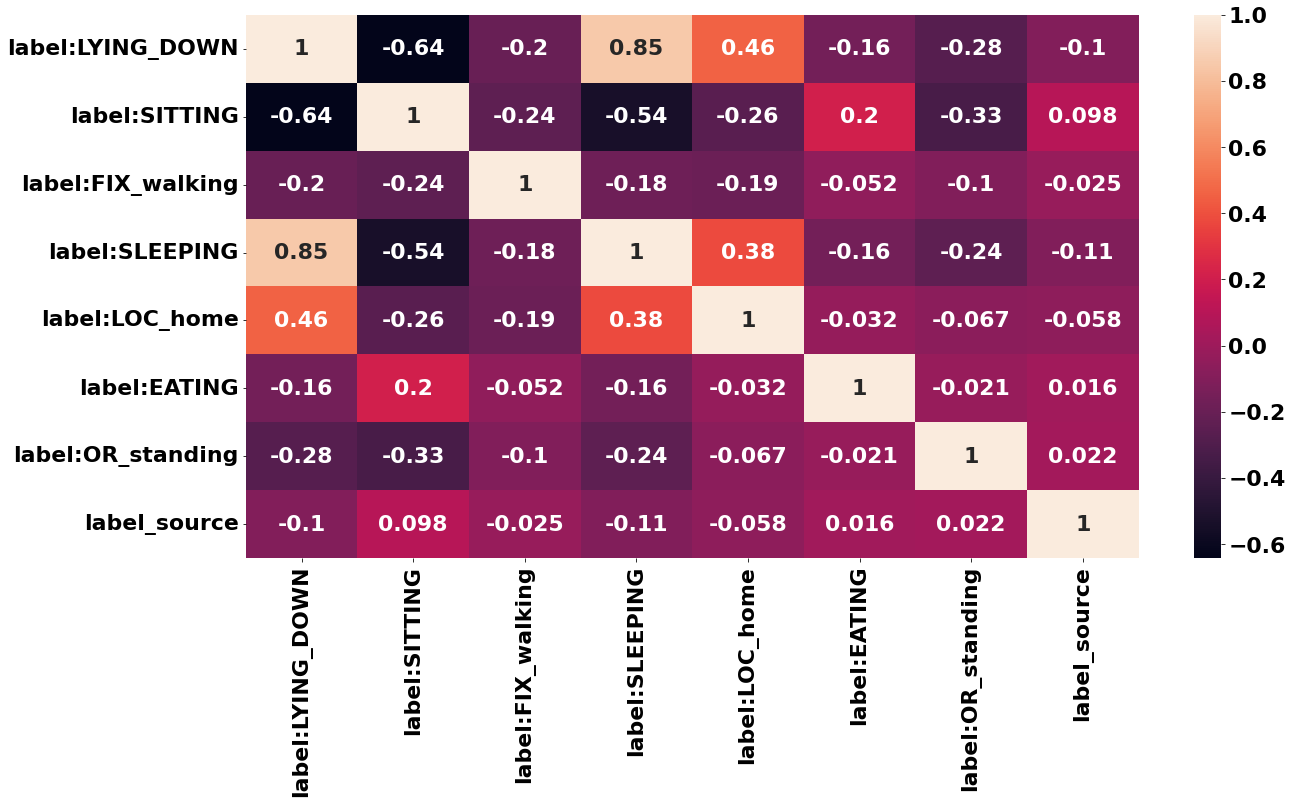

In [8]:

#plot correlation matrix to select best context labels for ml model
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
label_corr=label_df.corr()
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
fig = plt.figure(figsize=(20,10))
# sns.heatmap(acc_data_best_corr, annot = True, fmt = '.2f')
sns.heatmap(label_corr, annot = True)
plt.show()



In [9]:
#function to print data frame columns with their index
def print_df_columns(dataframe):
    for i in range(len(dataframe.columns)): 
        print(i,dataframe.columns[i])

In [10]:
#drop unwanted labels and some very high NAN columns from main dataframe
#dropping columns with NAN values above 92500
df=df.dropna(thresh=len(df) - 92500, axis=1)
#verify droped labels
print(df.loc[:, df.columns.str.startswith('label') ] ) 

      label:LYING_DOWN  label:SITTING  label:FIX_walking  label:SLEEPING  \
0                  0.0            1.0                0.0             0.0   
1                  0.0            1.0                0.0             0.0   
2                  0.0            1.0                0.0             0.0   
3                  0.0            1.0                0.0             0.0   
4                  0.0            1.0                0.0             0.0   
...                ...            ...                ...             ...   
4968               NaN            NaN                NaN             NaN   
4969               NaN            NaN                NaN             NaN   
4970               NaN            NaN                NaN             NaN   
4971               NaN            NaN                NaN             NaN   
4972               NaN            NaN                NaN             NaN   

      label:LOC_home  label:EATING  label:OR_standing  label_source  
0                

Sensors data

Type sensor data would be analysed individually and appropriate processing will be applied. Correlations will be done between features and labels to optimse selection of best features for models

In [11]:
# print_df_columns(df)

Accelerometer data

In [12]:
accellerometer_df = df.loc[:, df.columns.str.startswith('raw_acc') ] 
# print(accellerometer_df)

#fill null and missing values with column mean

for col_name in accellerometer_df.columns:
        df=df.fillna(value={col_name:(df[col_name]).mean()})
df.isnull().sum()


#verify if null values have been replaced in those columns


timestamp                              0
raw_acc:magnitude_stats:mean           0
raw_acc:magnitude_stats:std            0
raw_acc:magnitude_stats:moment3        0
raw_acc:magnitude_stats:moment4        0
                                   ...  
label:SLEEPING                     92078
label:LOC_home                     22012
label:EATING                       80865
label:OR_standing                  70752
label_source                           0
Length: 167, dtype: int64

In [13]:
#before correlation print dataframe columns indices to select right columns 
print_df_columns(df)

0 timestamp
1 raw_acc:magnitude_stats:mean
2 raw_acc:magnitude_stats:std
3 raw_acc:magnitude_stats:moment3
4 raw_acc:magnitude_stats:moment4
5 raw_acc:magnitude_stats:percentile25
6 raw_acc:magnitude_stats:percentile50
7 raw_acc:magnitude_stats:percentile75
8 raw_acc:magnitude_stats:value_entropy
9 raw_acc:magnitude_stats:time_entropy
10 raw_acc:magnitude_spectrum:log_energy_band0
11 raw_acc:magnitude_spectrum:log_energy_band1
12 raw_acc:magnitude_spectrum:log_energy_band2
13 raw_acc:magnitude_spectrum:log_energy_band3
14 raw_acc:magnitude_spectrum:log_energy_band4
15 raw_acc:magnitude_spectrum:spectral_entropy
16 raw_acc:magnitude_autocorrelation:period
17 raw_acc:magnitude_autocorrelation:normalized_ac
18 raw_acc:3d:mean_x
19 raw_acc:3d:mean_y
20 raw_acc:3d:mean_z
21 raw_acc:3d:std_x
22 raw_acc:3d:std_y
23 raw_acc:3d:std_z
24 raw_acc:3d:ro_xy
25 raw_acc:3d:ro_xz
26 raw_acc:3d:ro_yz
27 proc_gyro:magnitude_stats:mean
28 proc_gyro:magnitude_stats:std
29 proc_gyro:magnitude_stats:moment3

In [14]:
#plot correlation matrix between accelerometer data and labels
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


acc_data_best_corr=df.iloc[:, np.r_[1:27,159:166]].corr()
print(type(acc_data_best_corr))


# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 40}

# plt.rc('font', **font)  

# fig = plt.figure(figsize=(70,70))
# sns.heatmap(acc_data_best_corr, annot = True, fmt = '.2f')
# sns.heatmap(acc_data_best_corr, annot = True)
# plt.show()



# fig = plt.figure(figsize=(60,60), dpi = 480)
# sns.heatmap(acc_data_best_corr, annot = True, fmt = '.2f')
# plt.show()
# sns.heatmap(acc_data_best_corr.corr(all_labels_df),annot = True, fmt = '.2f')

<class 'pandas.core.frame.DataFrame'>


In [15]:
print(acc_data_best_corr[['label:LYING_DOWN','label:SITTING','label:FIX_walking','label:SLEEPING',
                          'label:LOC_home','label:EATING','label:OR_standing']])


                                                 label:LYING_DOWN  \
raw_acc:magnitude_stats:mean                            -0.054826   
raw_acc:magnitude_stats:std                             -0.237330   
raw_acc:magnitude_stats:moment3                         -0.202057   
raw_acc:magnitude_stats:moment4                         -0.244478   
raw_acc:magnitude_stats:percentile25                     0.110205   
raw_acc:magnitude_stats:percentile50                    -0.020853   
raw_acc:magnitude_stats:percentile75                    -0.130648   
raw_acc:magnitude_stats:value_entropy                    0.310583   
raw_acc:magnitude_stats:time_entropy                     0.135656   
raw_acc:magnitude_spectrum:log_energy_band0              0.112858   
raw_acc:magnitude_spectrum:log_energy_band1             -0.166055   
raw_acc:magnitude_spectrum:log_energy_band2             -0.229372   
raw_acc:magnitude_spectrum:log_energy_band3             -0.230876   
raw_acc:magnitude_spectrum:log_ene

As we can see above our best correlation values are round 0.2 and 0.3., with coefficients coming from correlation with  WALKING,LYING DOWN AND SLEEPING. Highest coefficients were produced by correlation with WALKING and this label may be the best to when traning a model with a single label. 

Two dataframes will be created;
1. For model with many labels: has features with correlation coefficients above +0.2 or below -0.2
2. For model with few label(s):has features with correlation coefficients above +0.3 or below -0.3

In [16]:
#create new data frame and drop accelerometer features with correlation coeffiecients less than 0.2
# first function for dropping features(above +0.2 or below -0.2) to train a model with more than two labels
# second function for dropping features(above +0.3 or below -0.3) to train a model with more two or single label
def drop_features_with_low_corr_vals(str_prefix):
    global df
    for feature in df.columns:
        if feature.startswith('{str_prefix}'.format(str_prefix=str_prefix)):
            if 0.2>df["{feature}".format(feature=feature)].corr(df['label:LYING_DOWN'])>-0.2 or 0.2>df["{feature}".format(feature=feature)].corr(df['label:FIX_walking'])>-0.2 or 0.2>df["{feature}".format(feature=feature)].corr(df['label:SLEEPING'])>-0.2:
                print(feature)
                new_df=df.drop(['{feature}'.format(feature=feature)], axis=1)
                df=new_df
                
#Create dataframe for less label(s)
df_forless_labels=df

#For Getting list of features to train a model with more two or single label.Dataframe will be created later
features_for_2OR_1_label=[]
# print(df_forless_labels.head())

# for feature in df_forless_labels.columns:
#         if feature.startswith('raw_acc'):
#             print(df["{feature}".format(feature=feature)].corr(df['label:FIX_walking']))
#             if  0.3>=df_forless_labels["{feature}".format(feature=feature)].corr(df_forless_labels['label:FIX_walking'])>=-0.3 or 0.3>=df_forless_labels["{feature}".format(feature=feature)].corr(df_forless_labels['label:LYING_DOWN'])>=-0.3 :
#                 print(feature)
def get_features_with_high_corr_vals2(dataframe,str_prefix):
    global features_for_2OR_1_label
    for feature in dataframe.columns:
        if feature.startswith('{str_prefix}'.format(str_prefix=str_prefix)):
            if  0.3>=df_forless_labels["{feature}".format(feature=feature)].corr(df_forless_labels['label:FIX_walking'])>=-0.3 or 0.3>=df_forless_labels["{feature}".format(feature=feature)].corr(df_forless_labels['label:LYING_DOWN'])>=-0.3:
                print(feature)
                features_for_2OR_1_label.append(feature)


# drop accelerometer features with low correlation coefficients   
drop_features_with_low_corr_vals("raw_acc")
  
#get accelerometer features for model with two or less labels
get_features_with_high_corr_vals2(df_forless_labels,"raw_acc")

raw_acc:magnitude_stats:mean
raw_acc:magnitude_stats:moment3
raw_acc:magnitude_stats:percentile25
raw_acc:magnitude_stats:percentile50
raw_acc:magnitude_stats:percentile75
raw_acc:magnitude_stats:value_entropy
raw_acc:magnitude_stats:time_entropy
raw_acc:magnitude_spectrum:log_energy_band0
raw_acc:magnitude_spectrum:log_energy_band1
raw_acc:magnitude_spectrum:spectral_entropy
raw_acc:magnitude_autocorrelation:period
raw_acc:magnitude_autocorrelation:normalized_ac
raw_acc:3d:mean_x
raw_acc:3d:mean_y
raw_acc:3d:mean_z
raw_acc:3d:ro_xy
raw_acc:3d:ro_xz
raw_acc:3d:ro_yz
raw_acc:magnitude_stats:mean
raw_acc:magnitude_stats:std
raw_acc:magnitude_stats:moment3
raw_acc:magnitude_stats:moment4
raw_acc:magnitude_stats:percentile25
raw_acc:magnitude_stats:percentile50
raw_acc:magnitude_stats:percentile75
raw_acc:magnitude_stats:value_entropy
raw_acc:magnitude_stats:time_entropy
raw_acc:magnitude_spectrum:log_energy_band0
raw_acc:magnitude_spectrum:log_energy_band1
raw_acc:magnitude_spectrum:log_e

In [17]:
print(features_for_2OR_1_label)


['raw_acc:magnitude_stats:mean', 'raw_acc:magnitude_stats:std', 'raw_acc:magnitude_stats:moment3', 'raw_acc:magnitude_stats:moment4', 'raw_acc:magnitude_stats:percentile25', 'raw_acc:magnitude_stats:percentile50', 'raw_acc:magnitude_stats:percentile75', 'raw_acc:magnitude_stats:value_entropy', 'raw_acc:magnitude_stats:time_entropy', 'raw_acc:magnitude_spectrum:log_energy_band0', 'raw_acc:magnitude_spectrum:log_energy_band1', 'raw_acc:magnitude_spectrum:log_energy_band2', 'raw_acc:magnitude_spectrum:log_energy_band3', 'raw_acc:magnitude_spectrum:log_energy_band4', 'raw_acc:magnitude_spectrum:spectral_entropy', 'raw_acc:magnitude_autocorrelation:period', 'raw_acc:magnitude_autocorrelation:normalized_ac', 'raw_acc:3d:mean_x', 'raw_acc:3d:mean_y', 'raw_acc:3d:mean_z', 'raw_acc:3d:std_x', 'raw_acc:3d:std_y', 'raw_acc:3d:std_z', 'raw_acc:3d:ro_xy', 'raw_acc:3d:ro_xz', 'raw_acc:3d:ro_yz']


Investigate the gyroscope columns and apply similar appropriate processing methods

In [18]:
print_df_columns(df)

0 timestamp
1 raw_acc:magnitude_stats:std
2 raw_acc:magnitude_stats:moment4
3 raw_acc:magnitude_spectrum:log_energy_band2
4 raw_acc:magnitude_spectrum:log_energy_band3
5 raw_acc:magnitude_spectrum:log_energy_band4
6 raw_acc:3d:std_x
7 raw_acc:3d:std_y
8 raw_acc:3d:std_z
9 proc_gyro:magnitude_stats:mean
10 proc_gyro:magnitude_stats:std
11 proc_gyro:magnitude_stats:moment3
12 proc_gyro:magnitude_stats:moment4
13 proc_gyro:magnitude_stats:percentile25
14 proc_gyro:magnitude_stats:percentile50
15 proc_gyro:magnitude_stats:percentile75
16 proc_gyro:magnitude_stats:value_entropy
17 proc_gyro:magnitude_stats:time_entropy
18 proc_gyro:magnitude_spectrum:log_energy_band0
19 proc_gyro:magnitude_spectrum:log_energy_band1
20 proc_gyro:magnitude_spectrum:log_energy_band2
21 proc_gyro:magnitude_spectrum:log_energy_band3
22 proc_gyro:magnitude_spectrum:log_energy_band4
23 proc_gyro:magnitude_spectrum:spectral_entropy
24 proc_gyro:magnitude_autocorrelation:period
25 proc_gyro:magnitude_autocorrelation

In [19]:
gyroscope_df = df.loc[:, df.columns.str.startswith('proc_gyro') ] 
print(gyroscope_df.head(5))
gyroscope_df.isnull().sum()

   proc_gyro:magnitude_stats:mean  proc_gyro:magnitude_stats:std  \
0                        0.002558                       0.001510   
1                        0.002279                       0.001256   
2                        0.002579                       0.001790   
3                        0.002497                       0.001577   
4                        0.105566                       0.340573   

   proc_gyro:magnitude_stats:moment3  proc_gyro:magnitude_stats:moment4  \
0                           0.001832                           0.002531   
1                           0.001519                           0.002183   
2                           0.002418                           0.003395   
3                           0.001944                           0.002715   
4                           0.582097                           0.825209   

   proc_gyro:magnitude_stats:percentile25  \
0                                0.001526   
1                                0.001424   
2    

proc_gyro:magnitude_stats:mean                       17434
proc_gyro:magnitude_stats:std                        17434
proc_gyro:magnitude_stats:moment3                    17434
proc_gyro:magnitude_stats:moment4                    17434
proc_gyro:magnitude_stats:percentile25               17434
proc_gyro:magnitude_stats:percentile50               17434
proc_gyro:magnitude_stats:percentile75               17434
proc_gyro:magnitude_stats:value_entropy              17434
proc_gyro:magnitude_stats:time_entropy               17434
proc_gyro:magnitude_spectrum:log_energy_band0        17434
proc_gyro:magnitude_spectrum:log_energy_band1        17434
proc_gyro:magnitude_spectrum:log_energy_band2        17434
proc_gyro:magnitude_spectrum:log_energy_band3        17434
proc_gyro:magnitude_spectrum:log_energy_band4        17434
proc_gyro:magnitude_spectrum:spectral_entropy        17434
proc_gyro:magnitude_autocorrelation:period           17434
proc_gyro:magnitude_autocorrelation:normalized_ac    174

Null values in gyroscope data are quite huge but would be insignificant compared to data points of approximately 370000
hence we can replace them with corresponding column mean

In [20]:
print_df_columns(df_forless_labels)

0 timestamp
1 raw_acc:magnitude_stats:mean
2 raw_acc:magnitude_stats:std
3 raw_acc:magnitude_stats:moment3
4 raw_acc:magnitude_stats:moment4
5 raw_acc:magnitude_stats:percentile25
6 raw_acc:magnitude_stats:percentile50
7 raw_acc:magnitude_stats:percentile75
8 raw_acc:magnitude_stats:value_entropy
9 raw_acc:magnitude_stats:time_entropy
10 raw_acc:magnitude_spectrum:log_energy_band0
11 raw_acc:magnitude_spectrum:log_energy_band1
12 raw_acc:magnitude_spectrum:log_energy_band2
13 raw_acc:magnitude_spectrum:log_energy_band3
14 raw_acc:magnitude_spectrum:log_energy_band4
15 raw_acc:magnitude_spectrum:spectral_entropy
16 raw_acc:magnitude_autocorrelation:period
17 raw_acc:magnitude_autocorrelation:normalized_ac
18 raw_acc:3d:mean_x
19 raw_acc:3d:mean_y
20 raw_acc:3d:mean_z
21 raw_acc:3d:std_x
22 raw_acc:3d:std_y
23 raw_acc:3d:std_z
24 raw_acc:3d:ro_xy
25 raw_acc:3d:ro_xz
26 raw_acc:3d:ro_yz
27 proc_gyro:magnitude_stats:mean
28 proc_gyro:magnitude_stats:std
29 proc_gyro:magnitude_stats:moment3

In [21]:
def fill_null_values_withColumn_Mean(dataframe,sensor_df):
    global df
    for col_name in sensor_df.columns:
        new_df=dataframe.fillna(value={col_name:(dataframe[col_name]).mean()})
        df=new_df

#function to do same to df_forless_labels
def fill_null_values_withColumn_Mean2(dataframe,sensor_df):
    global df_forless_labels
    for col_name in sensor_df.columns:
        new_df=dataframe.fillna(value={col_name:(dataframe[col_name]).mean()})
        df_forless_labels=new_df
    
for col_name in gyroscope_df.columns:
        df=df.fillna(value={col_name:(df[col_name]).mean()})
        
        
for col_name in gyroscope_df.columns:
        df_forless_labels=df_forless_labels.fillna(value={col_name:(df_forless_labels[col_name]).mean()})
       
    
# for col_name in gyroscope_df.columns:
#         df=df.fillna(value={col_name:(df[col_name]).mean()})
# fill_null_values_withColumn_Mean(df,gyroscope_df)
# fill_null_values_withColumn_Mean2(df_forless_labels,gyroscope_df)



In [22]:
print_df_columns(df)

0 timestamp
1 raw_acc:magnitude_stats:std
2 raw_acc:magnitude_stats:moment4
3 raw_acc:magnitude_spectrum:log_energy_band2
4 raw_acc:magnitude_spectrum:log_energy_band3
5 raw_acc:magnitude_spectrum:log_energy_band4
6 raw_acc:3d:std_x
7 raw_acc:3d:std_y
8 raw_acc:3d:std_z
9 proc_gyro:magnitude_stats:mean
10 proc_gyro:magnitude_stats:std
11 proc_gyro:magnitude_stats:moment3
12 proc_gyro:magnitude_stats:moment4
13 proc_gyro:magnitude_stats:percentile25
14 proc_gyro:magnitude_stats:percentile50
15 proc_gyro:magnitude_stats:percentile75
16 proc_gyro:magnitude_stats:value_entropy
17 proc_gyro:magnitude_stats:time_entropy
18 proc_gyro:magnitude_spectrum:log_energy_band0
19 proc_gyro:magnitude_spectrum:log_energy_band1
20 proc_gyro:magnitude_spectrum:log_energy_band2
21 proc_gyro:magnitude_spectrum:log_energy_band3
22 proc_gyro:magnitude_spectrum:log_energy_band4
23 proc_gyro:magnitude_spectrum:spectral_entropy
24 proc_gyro:magnitude_autocorrelation:period
25 proc_gyro:magnitude_autocorrelation

In [23]:
print_df_columns(df_forless_labels)

0 timestamp
1 raw_acc:magnitude_stats:mean
2 raw_acc:magnitude_stats:std
3 raw_acc:magnitude_stats:moment3
4 raw_acc:magnitude_stats:moment4
5 raw_acc:magnitude_stats:percentile25
6 raw_acc:magnitude_stats:percentile50
7 raw_acc:magnitude_stats:percentile75
8 raw_acc:magnitude_stats:value_entropy
9 raw_acc:magnitude_stats:time_entropy
10 raw_acc:magnitude_spectrum:log_energy_band0
11 raw_acc:magnitude_spectrum:log_energy_band1
12 raw_acc:magnitude_spectrum:log_energy_band2
13 raw_acc:magnitude_spectrum:log_energy_band3
14 raw_acc:magnitude_spectrum:log_energy_band4
15 raw_acc:magnitude_spectrum:spectral_entropy
16 raw_acc:magnitude_autocorrelation:period
17 raw_acc:magnitude_autocorrelation:normalized_ac
18 raw_acc:3d:mean_x
19 raw_acc:3d:mean_y
20 raw_acc:3d:mean_z
21 raw_acc:3d:std_x
22 raw_acc:3d:std_y
23 raw_acc:3d:std_z
24 raw_acc:3d:ro_xy
25 raw_acc:3d:ro_xz
26 raw_acc:3d:ro_yz
27 proc_gyro:magnitude_stats:mean
28 proc_gyro:magnitude_stats:std
29 proc_gyro:magnitude_stats:moment3

In [24]:
# verify null values have been filled for both
df.isnull().sum()[9:35]
df_forless_labels.isnull().sum()[27:53]

proc_gyro:magnitude_stats:mean                       0
proc_gyro:magnitude_stats:std                        0
proc_gyro:magnitude_stats:moment3                    0
proc_gyro:magnitude_stats:moment4                    0
proc_gyro:magnitude_stats:percentile25               0
proc_gyro:magnitude_stats:percentile50               0
proc_gyro:magnitude_stats:percentile75               0
proc_gyro:magnitude_stats:value_entropy              0
proc_gyro:magnitude_stats:time_entropy               0
proc_gyro:magnitude_spectrum:log_energy_band0        0
proc_gyro:magnitude_spectrum:log_energy_band1        0
proc_gyro:magnitude_spectrum:log_energy_band2        0
proc_gyro:magnitude_spectrum:log_energy_band3        0
proc_gyro:magnitude_spectrum:log_energy_band4        0
proc_gyro:magnitude_spectrum:spectral_entropy        0
proc_gyro:magnitude_autocorrelation:period           0
proc_gyro:magnitude_autocorrelation:normalized_ac    0
proc_gyro:3d:mean_x                                  0
proc_gyro:

view correlation between our gyroscope data and labels

In [25]:
gyro_data_corr=df.iloc[:, np.r_[9:35,141:148]].corr()
print(gyro_data_corr[['label:LYING_DOWN','label:SITTING','label:FIX_walking','label:SLEEPING',
                          'label:LOC_home','label:EATING','label:OR_standing']])

                                                   label:LYING_DOWN  \
proc_gyro:magnitude_stats:mean                            -0.200914   
proc_gyro:magnitude_stats:std                             -0.245522   
proc_gyro:magnitude_stats:moment3                         -0.222223   
proc_gyro:magnitude_stats:moment4                         -0.221931   
proc_gyro:magnitude_stats:percentile25                    -0.130197   
proc_gyro:magnitude_stats:percentile50                    -0.168646   
proc_gyro:magnitude_stats:percentile75                    -0.203730   
proc_gyro:magnitude_stats:value_entropy                    0.122726   
proc_gyro:magnitude_stats:time_entropy                     0.122065   
proc_gyro:magnitude_spectrum:log_energy_band0             -0.222132   
proc_gyro:magnitude_spectrum:log_energy_band1             -0.293541   
proc_gyro:magnitude_spectrum:log_energy_band2             -0.257683   
proc_gyro:magnitude_spectrum:log_energy_band3             -0.160576   
proc_g

In [26]:
# drop gyroscope features with low correlation coefficients   
drop_features_with_low_corr_vals("proc_gyro")
  
#get gyroscope features for model with two or less labels
get_features_with_high_corr_vals2(df_forless_labels,"proc_gyro")

proc_gyro:magnitude_stats:mean
proc_gyro:magnitude_stats:percentile25
proc_gyro:magnitude_stats:percentile50
proc_gyro:magnitude_stats:percentile75
proc_gyro:magnitude_stats:value_entropy
proc_gyro:magnitude_stats:time_entropy
proc_gyro:magnitude_spectrum:log_energy_band0
proc_gyro:magnitude_spectrum:log_energy_band1
proc_gyro:magnitude_spectrum:log_energy_band2
proc_gyro:magnitude_spectrum:log_energy_band3
proc_gyro:magnitude_spectrum:log_energy_band4
proc_gyro:magnitude_spectrum:spectral_entropy
proc_gyro:magnitude_autocorrelation:period
proc_gyro:magnitude_autocorrelation:normalized_ac
proc_gyro:3d:mean_x
proc_gyro:3d:mean_y
proc_gyro:3d:mean_z
proc_gyro:3d:ro_xy
proc_gyro:3d:ro_xz
proc_gyro:3d:ro_yz
proc_gyro:magnitude_stats:mean
proc_gyro:magnitude_stats:std
proc_gyro:magnitude_stats:moment3
proc_gyro:magnitude_stats:moment4
proc_gyro:magnitude_stats:percentile25
proc_gyro:magnitude_stats:percentile50
proc_gyro:magnitude_stats:percentile75
proc_gyro:magnitude_stats:value_entropy
p

In [27]:
magnetic_df = df.loc[:, df.columns.str.startswith('raw_magnet') ] 
print(magnetic_df.head(5))
magnetic_df.isnull().sum()

   raw_magnet:magnitude_stats:mean  raw_magnet:magnitude_stats:std  \
0                       618.751929                        0.784768   
1                       618.834334                        0.758077   
2                       618.632716                        0.755343   
3                       618.757055                        0.742001   
4                       613.681143                       10.944928   

   raw_magnet:magnitude_stats:moment3  raw_magnet:magnitude_stats:moment4  \
0                           -0.313058                            1.038986   
1                           -0.249869                            0.993019   
2                           -0.359531                            0.985042   
3                            0.360829                            0.975374   
4                           14.981543                           20.677301   

   raw_magnet:magnitude_stats:percentile25  \
0                               618.243941   
1                       

raw_magnet:magnitude_stats:mean                       31321
raw_magnet:magnitude_stats:std                        31321
raw_magnet:magnitude_stats:moment3                    31321
raw_magnet:magnitude_stats:moment4                    31321
raw_magnet:magnitude_stats:percentile25               31321
raw_magnet:magnitude_stats:percentile50               31321
raw_magnet:magnitude_stats:percentile75               31321
raw_magnet:magnitude_stats:value_entropy              31321
raw_magnet:magnitude_stats:time_entropy               31321
raw_magnet:magnitude_spectrum:log_energy_band0        31321
raw_magnet:magnitude_spectrum:log_energy_band1        31321
raw_magnet:magnitude_spectrum:log_energy_band2        31321
raw_magnet:magnitude_spectrum:log_energy_band3        31321
raw_magnet:magnitude_spectrum:log_energy_band4        31321
raw_magnet:magnitude_spectrum:spectral_entropy        31321
raw_magnet:magnitude_autocorrelation:period           31321
raw_magnet:magnitude_autocorrelation:nor

In [28]:
# print_df_columns(df)
print_df_columns(df_forless_labels)

0 timestamp
1 raw_acc:magnitude_stats:mean
2 raw_acc:magnitude_stats:std
3 raw_acc:magnitude_stats:moment3
4 raw_acc:magnitude_stats:moment4
5 raw_acc:magnitude_stats:percentile25
6 raw_acc:magnitude_stats:percentile50
7 raw_acc:magnitude_stats:percentile75
8 raw_acc:magnitude_stats:value_entropy
9 raw_acc:magnitude_stats:time_entropy
10 raw_acc:magnitude_spectrum:log_energy_band0
11 raw_acc:magnitude_spectrum:log_energy_band1
12 raw_acc:magnitude_spectrum:log_energy_band2
13 raw_acc:magnitude_spectrum:log_energy_band3
14 raw_acc:magnitude_spectrum:log_energy_band4
15 raw_acc:magnitude_spectrum:spectral_entropy
16 raw_acc:magnitude_autocorrelation:period
17 raw_acc:magnitude_autocorrelation:normalized_ac
18 raw_acc:3d:mean_x
19 raw_acc:3d:mean_y
20 raw_acc:3d:mean_z
21 raw_acc:3d:std_x
22 raw_acc:3d:std_y
23 raw_acc:3d:std_z
24 raw_acc:3d:ro_xy
25 raw_acc:3d:ro_xz
26 raw_acc:3d:ro_yz
27 proc_gyro:magnitude_stats:mean
28 proc_gyro:magnitude_stats:std
29 proc_gyro:magnitude_stats:moment3

In [29]:
for col_name in magnetic_df.columns:
        df=df.fillna(value={col_name:(df[col_name]).mean()})
df.isnull().sum()[15:46]

for col_name in magnetic_df.columns:
        df_forless_labels=df_forless_labels.fillna(value={col_name:(df_forless_labels[col_name]).mean()})
df_forless_labels.isnull().sum()[53:84]

raw_magnet:magnitude_stats:mean                       0
raw_magnet:magnitude_stats:std                        0
raw_magnet:magnitude_stats:moment3                    0
raw_magnet:magnitude_stats:moment4                    0
raw_magnet:magnitude_stats:percentile25               0
raw_magnet:magnitude_stats:percentile50               0
raw_magnet:magnitude_stats:percentile75               0
raw_magnet:magnitude_stats:value_entropy              0
raw_magnet:magnitude_stats:time_entropy               0
raw_magnet:magnitude_spectrum:log_energy_band0        0
raw_magnet:magnitude_spectrum:log_energy_band1        0
raw_magnet:magnitude_spectrum:log_energy_band2        0
raw_magnet:magnitude_spectrum:log_energy_band3        0
raw_magnet:magnitude_spectrum:log_energy_band4        0
raw_magnet:magnitude_spectrum:spectral_entropy        0
raw_magnet:magnitude_autocorrelation:period           0
raw_magnet:magnitude_autocorrelation:normalized_ac    0
raw_magnet:3d:mean_x                            

magnetic data correlation with labels

In [30]:
magnetic_data_corr=df.iloc[:, np.r_[15:46,121:128]].corr()
print(magnetic_data_corr[['label:LYING_DOWN','label:SITTING','label:FIX_walking','label:SLEEPING',
                          'label:LOC_home','label:EATING','label:OR_standing']])

                                                    label:LYING_DOWN  \
raw_magnet:magnitude_stats:mean                             0.043749   
raw_magnet:magnitude_stats:std                             -0.075691   
raw_magnet:magnitude_stats:moment3                         -0.001343   
raw_magnet:magnitude_stats:moment4                         -0.067181   
raw_magnet:magnitude_stats:percentile25                     0.046576   
raw_magnet:magnitude_stats:percentile50                     0.043563   
raw_magnet:magnitude_stats:percentile75                     0.040888   
raw_magnet:magnitude_stats:value_entropy                   -0.004515   
raw_magnet:magnitude_stats:time_entropy                     0.018702   
raw_magnet:magnitude_spectrum:log_energy_band0             -0.010763   
raw_magnet:magnitude_spectrum:log_energy_band1             -0.089685   
raw_magnet:magnitude_spectrum:log_energy_band2             -0.080146   
raw_magnet:magnitude_spectrum:log_energy_band3             -0.03

magnetic data has very bad correlation with labels

In [31]:
drop_features_with_low_corr_vals("raw_magnet")

raw_magnet:magnitude_stats:mean
raw_magnet:magnitude_stats:std
raw_magnet:magnitude_stats:moment3
raw_magnet:magnitude_stats:moment4
raw_magnet:magnitude_stats:percentile25
raw_magnet:magnitude_stats:percentile50
raw_magnet:magnitude_stats:percentile75
raw_magnet:magnitude_stats:value_entropy
raw_magnet:magnitude_stats:time_entropy
raw_magnet:magnitude_spectrum:log_energy_band0
raw_magnet:magnitude_spectrum:log_energy_band1
raw_magnet:magnitude_spectrum:log_energy_band2
raw_magnet:magnitude_spectrum:log_energy_band3
raw_magnet:magnitude_spectrum:log_energy_band4
raw_magnet:magnitude_spectrum:spectral_entropy
raw_magnet:magnitude_autocorrelation:period
raw_magnet:magnitude_autocorrelation:normalized_ac
raw_magnet:3d:mean_x
raw_magnet:3d:mean_y
raw_magnet:3d:mean_z
raw_magnet:3d:std_x
raw_magnet:3d:std_y
raw_magnet:3d:std_z
raw_magnet:3d:ro_xy
raw_magnet:3d:ro_xz
raw_magnet:3d:ro_yz
raw_magnet:avr_cosine_similarity_lag_range0
raw_magnet:avr_cosine_similarity_lag_range1
raw_magnet:avr_cos

As we see above all magnetic data have been dropped because of poor correlation coefficients

Watch data

In [32]:
print_df_columns(df)

0 timestamp
1 raw_acc:magnitude_stats:std
2 raw_acc:magnitude_stats:moment4
3 raw_acc:magnitude_spectrum:log_energy_band2
4 raw_acc:magnitude_spectrum:log_energy_band3
5 raw_acc:magnitude_spectrum:log_energy_band4
6 raw_acc:3d:std_x
7 raw_acc:3d:std_y
8 raw_acc:3d:std_z
9 proc_gyro:magnitude_stats:std
10 proc_gyro:magnitude_stats:moment3
11 proc_gyro:magnitude_stats:moment4
12 proc_gyro:3d:std_x
13 proc_gyro:3d:std_y
14 proc_gyro:3d:std_z
15 location:num_valid_updates
16 location:log_latitude_range
17 location:log_longitude_range
18 location:best_horizontal_accuracy
19 location:diameter
20 location:log_diameter
21 location_quick_features:std_lat
22 location_quick_features:std_long
23 location_quick_features:lat_change
24 location_quick_features:long_change
25 location_quick_features:mean_abs_lat_deriv
26 location_quick_features:mean_abs_long_deriv
27 audio_naive:mfcc0:mean
28 audio_naive:mfcc1:mean
29 audio_naive:mfcc2:mean
30 audio_naive:mfcc3:mean
31 audio_naive:mfcc4:mean
32 audio_n

In [33]:
watch_df = df.loc[:, df.columns.str.startswith('watch') ] 
print(watch_df.head(5))
watch_df.isnull().sum()

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


Series([], dtype: float64)

132-229 thousand null values are quite huge for the watch data. As we can see they have already been dropped from the data frame because of the condition we initially set(drop columns with null values equal to or greater than 92500)

In [34]:
# for col_name in watch_df.columns:
#         df=df.fillna(value={col_name:(df[col_name]).mean()})
# df.isnull().sum()[84:139]

location data

In [35]:
location_df = df.loc[:, df.columns.str.startswith('location') ] 
print(location_df.head(5))
location_df.isnull().sum()

   location:num_valid_updates  location:log_latitude_range  \
0                         4.0                     0.064895   
1                         7.0                     0.072793   
2                         8.0                     0.004599   
3                         8.0                     0.017508   
4                         8.0                     0.033513   

   location:log_longitude_range  location:best_horizontal_accuracy  \
0                      0.070473                               65.0   
1                      0.061653                               65.0   
2                      0.004253                               65.0   
3                      0.010553                               65.0   
4                      0.037707                               65.0   

   location:diameter  location:log_diameter  location_quick_features:std_lat  \
0          10.102999               2.312832                         0.000029   
1           9.611984               2.263011   

location:num_valid_updates                     43412
location:log_latitude_range                    75347
location:log_longitude_range                   75347
location:best_horizontal_accuracy              72008
location:diameter                              43412
location:log_diameter                          43412
location_quick_features:std_lat                56770
location_quick_features:std_long               59745
location_quick_features:lat_change             55058
location_quick_features:long_change            55058
location_quick_features:mean_abs_lat_deriv     59330
location_quick_features:mean_abs_long_deriv    59350
dtype: int64

Since the location data is relative, we dont need to apply any special conversion(like to polar cordinates) 
but we may drop those columns with large null values like
(location:min_speed ,location:max_speed,location:min_altitude,location:max_altitude,location:min_speed,location:max_speed,location:best_vertical_accuracy)
and replace the other nulls with column mean

In [36]:
print_df_columns(df_forless_labels)

0 timestamp
1 raw_acc:magnitude_stats:mean
2 raw_acc:magnitude_stats:std
3 raw_acc:magnitude_stats:moment3
4 raw_acc:magnitude_stats:moment4
5 raw_acc:magnitude_stats:percentile25
6 raw_acc:magnitude_stats:percentile50
7 raw_acc:magnitude_stats:percentile75
8 raw_acc:magnitude_stats:value_entropy
9 raw_acc:magnitude_stats:time_entropy
10 raw_acc:magnitude_spectrum:log_energy_band0
11 raw_acc:magnitude_spectrum:log_energy_band1
12 raw_acc:magnitude_spectrum:log_energy_band2
13 raw_acc:magnitude_spectrum:log_energy_band3
14 raw_acc:magnitude_spectrum:log_energy_band4
15 raw_acc:magnitude_spectrum:spectral_entropy
16 raw_acc:magnitude_autocorrelation:period
17 raw_acc:magnitude_autocorrelation:normalized_ac
18 raw_acc:3d:mean_x
19 raw_acc:3d:mean_y
20 raw_acc:3d:mean_z
21 raw_acc:3d:std_x
22 raw_acc:3d:std_y
23 raw_acc:3d:std_z
24 raw_acc:3d:ro_xy
25 raw_acc:3d:ro_xz
26 raw_acc:3d:ro_yz
27 proc_gyro:magnitude_stats:mean
28 proc_gyro:magnitude_stats:std
29 proc_gyro:magnitude_stats:moment3

In [37]:
#replace null values
for col_name in location_df.columns:
        df=df.fillna(value={col_name:(df[col_name]).mean()})
df.isnull().sum()[15:27]

for col_name in location_df.columns:
        df_forless_labels=df_forless_labels.fillna(value={col_name:(df_forless_labels[col_name]).mean()})
df_forless_labels.isnull().sum()[84:96]

location:num_valid_updates                     0
location:log_latitude_range                    0
location:log_longitude_range                   0
location:best_horizontal_accuracy              0
location:diameter                              0
location:log_diameter                          0
location_quick_features:std_lat                0
location_quick_features:std_long               0
location_quick_features:lat_change             0
location_quick_features:long_change            0
location_quick_features:mean_abs_lat_deriv     0
location_quick_features:mean_abs_long_deriv    0
dtype: int64

location data correlation with labels

In [38]:
location_data_corr=df.iloc[:, np.r_[15:27,90:97]].corr()
print(location_data_corr[['label:LYING_DOWN','label:SITTING','label:FIX_walking','label:SLEEPING',
                          'label:LOC_home','label:EATING','label:OR_standing']])

                                             label:LYING_DOWN  label:SITTING  \
location:num_valid_updates                           0.115204      -0.111707   
location:log_latitude_range                         -0.112804       0.047533   
location:log_longitude_range                        -0.115423       0.046573   
location:best_horizontal_accuracy                   -0.162707       0.149736   
location:diameter                                   -0.110988       0.088396   
location:log_diameter                               -0.120007       0.032866   
location_quick_features:std_lat                     -0.069930       0.066012   
location_quick_features:std_long                    -0.055692       0.057501   
location_quick_features:lat_change                   0.001350       0.003840   
location_quick_features:long_change                 -0.003678      -0.003642   
location_quick_features:mean_abs_lat_deriv          -0.025783       0.029278   
location_quick_features:mean_abs_long_de

In [39]:
drop_features_with_low_corr_vals("location")

location:num_valid_updates
location:log_latitude_range
location:log_longitude_range
location:best_horizontal_accuracy
location:diameter
location:log_diameter
location_quick_features:std_lat
location_quick_features:std_long
location_quick_features:lat_change
location_quick_features:long_change
location_quick_features:mean_abs_lat_deriv
location_quick_features:mean_abs_long_deriv


As shown above, all location data have been dropped as a result of low correlation coefficients

Audio data

In [40]:
audio_df = df.loc[:, df.columns.str.startswith('audio') ] 
print(audio_df.head(5))
audio_df.isnull().sum()

   audio_naive:mfcc0:mean  audio_naive:mfcc1:mean  audio_naive:mfcc2:mean  \
0               -4.219657               -0.012806               -1.298291   
1               -7.505606                1.294372               -0.745550   
2               -7.966769                1.309082               -0.770455   
3               -5.367933                0.182373               -0.891874   
4              -13.415772                0.908387               -1.442258   

   audio_naive:mfcc3:mean  audio_naive:mfcc4:mean  audio_naive:mfcc5:mean  \
0                0.094373               -1.220977               -0.851300   
1               -0.052791               -1.220453               -0.822848   
2                0.080046               -1.238489               -0.922404   
3                0.112003               -1.437741               -0.770266   
4               -0.294636               -1.760813               -1.104186   

   audio_naive:mfcc6:mean  audio_naive:mfcc7:mean  audio_naive:mfcc8:mean 

audio_naive:mfcc0:mean                       9594
audio_naive:mfcc1:mean                       9594
audio_naive:mfcc2:mean                       9594
audio_naive:mfcc3:mean                       9594
audio_naive:mfcc4:mean                       9594
audio_naive:mfcc5:mean                       9594
audio_naive:mfcc6:mean                       9594
audio_naive:mfcc7:mean                       9594
audio_naive:mfcc8:mean                       9594
audio_naive:mfcc9:mean                       9594
audio_naive:mfcc10:mean                      9594
audio_naive:mfcc11:mean                      9594
audio_naive:mfcc12:mean                      9594
audio_naive:mfcc0:std                        9594
audio_naive:mfcc1:std                        9594
audio_naive:mfcc2:std                        9594
audio_naive:mfcc3:std                        9594
audio_naive:mfcc4:std                        9594
audio_naive:mfcc5:std                        9594
audio_naive:mfcc6:std                        9594


In [41]:
# print_df_columns(df)
print_df_columns(df_forless_labels)

0 timestamp
1 raw_acc:magnitude_stats:mean
2 raw_acc:magnitude_stats:std
3 raw_acc:magnitude_stats:moment3
4 raw_acc:magnitude_stats:moment4
5 raw_acc:magnitude_stats:percentile25
6 raw_acc:magnitude_stats:percentile50
7 raw_acc:magnitude_stats:percentile75
8 raw_acc:magnitude_stats:value_entropy
9 raw_acc:magnitude_stats:time_entropy
10 raw_acc:magnitude_spectrum:log_energy_band0
11 raw_acc:magnitude_spectrum:log_energy_band1
12 raw_acc:magnitude_spectrum:log_energy_band2
13 raw_acc:magnitude_spectrum:log_energy_band3
14 raw_acc:magnitude_spectrum:log_energy_band4
15 raw_acc:magnitude_spectrum:spectral_entropy
16 raw_acc:magnitude_autocorrelation:period
17 raw_acc:magnitude_autocorrelation:normalized_ac
18 raw_acc:3d:mean_x
19 raw_acc:3d:mean_y
20 raw_acc:3d:mean_z
21 raw_acc:3d:std_x
22 raw_acc:3d:std_y
23 raw_acc:3d:std_z
24 raw_acc:3d:ro_xy
25 raw_acc:3d:ro_xz
26 raw_acc:3d:ro_yz
27 proc_gyro:magnitude_stats:mean
28 proc_gyro:magnitude_stats:std
29 proc_gyro:magnitude_stats:moment3

null values are relatively small, so lets replace them with column means

In [42]:
for col_name in audio_df.columns:
        df=df.fillna(value={col_name:(df[col_name]).mean()})
df.isnull().sum()[15:42]

for col_name in audio_df.columns:
        df_forless_labels=df_forless_labels.fillna(value={col_name:(df_forless_labels[col_name]).mean()})
df_forless_labels.isnull().sum()[96:124]

audio_naive:mfcc0:mean                       0
audio_naive:mfcc1:mean                       0
audio_naive:mfcc2:mean                       0
audio_naive:mfcc3:mean                       0
audio_naive:mfcc4:mean                       0
audio_naive:mfcc5:mean                       0
audio_naive:mfcc6:mean                       0
audio_naive:mfcc7:mean                       0
audio_naive:mfcc8:mean                       0
audio_naive:mfcc9:mean                       0
audio_naive:mfcc10:mean                      0
audio_naive:mfcc11:mean                      0
audio_naive:mfcc12:mean                      0
audio_naive:mfcc0:std                        0
audio_naive:mfcc1:std                        0
audio_naive:mfcc2:std                        0
audio_naive:mfcc3:std                        0
audio_naive:mfcc4:std                        0
audio_naive:mfcc5:std                        0
audio_naive:mfcc6:std                        0
audio_naive:mfcc7:std                        0
audio_naive:m

In [43]:
audio_data_corr=df.iloc[:, np.r_[15:42,78:85]].corr()
print(audio_data_corr[['label:LYING_DOWN','label:SITTING','label:FIX_walking','label:SLEEPING',
                          'label:LOC_home','label:EATING','label:OR_standing']])

                                label:LYING_DOWN  label:SITTING  \
audio_naive:mfcc0:mean                  0.220723      -0.168282   
audio_naive:mfcc1:mean                 -0.337529       0.213655   
audio_naive:mfcc2:mean                  0.036788      -0.012552   
audio_naive:mfcc3:mean                  0.076821      -0.020398   
audio_naive:mfcc4:mean                  0.075280      -0.054416   
audio_naive:mfcc5:mean                  0.212014      -0.149555   
audio_naive:mfcc6:mean                  0.078999      -0.070240   
audio_naive:mfcc7:mean                  0.161733      -0.124727   
audio_naive:mfcc8:mean                  0.007497      -0.024281   
audio_naive:mfcc9:mean                  0.085284      -0.084199   
audio_naive:mfcc10:mean                 0.050342      -0.049537   
audio_naive:mfcc11:mean                 0.093936      -0.079714   
audio_naive:mfcc12:mean                 0.057771      -0.049810   
audio_naive:mfcc0:std                  -0.252059       0.12113

In [44]:
drop_features_with_low_corr_vals("audio")

#get audio features for model with two or less labels
get_features_with_high_corr_vals2(df_forless_labels,"audio")

audio_naive:mfcc0:mean
audio_naive:mfcc1:mean
audio_naive:mfcc2:mean
audio_naive:mfcc3:mean
audio_naive:mfcc4:mean
audio_naive:mfcc5:mean
audio_naive:mfcc6:mean
audio_naive:mfcc7:mean
audio_naive:mfcc8:mean
audio_naive:mfcc9:mean
audio_naive:mfcc10:mean
audio_naive:mfcc11:mean
audio_naive:mfcc12:mean
audio_naive:mfcc0:std
audio_naive:mfcc1:std
audio_naive:mfcc2:std
audio_naive:mfcc3:std
audio_naive:mfcc4:std
audio_naive:mfcc5:std
audio_naive:mfcc6:std
audio_naive:mfcc7:std
audio_naive:mfcc8:std
audio_naive:mfcc9:std
audio_naive:mfcc10:std
audio_naive:mfcc11:std
audio_naive:mfcc12:std
audio_properties:max_abs_value
audio_properties:normalization_multiplier
audio_naive:mfcc0:mean
audio_naive:mfcc1:mean
audio_naive:mfcc2:mean
audio_naive:mfcc3:mean
audio_naive:mfcc4:mean
audio_naive:mfcc5:mean
audio_naive:mfcc6:mean
audio_naive:mfcc7:mean
audio_naive:mfcc8:mean
audio_naive:mfcc9:mean
audio_naive:mfcc10:mean
audio_naive:mfcc11:mean
audio_naive:mfcc12:mean
audio_naive:mfcc0:std
audio_naive:

Phone-state data

In [45]:
discrete_df = df.loc[:, df.columns.str.startswith('discrete') ] 
print(discrete_df.head(5))
discrete_df.isnull().sum()

   discrete:app_state:is_active  discrete:app_state:is_inactive  \
0                           0.0                             1.0   
1                           1.0                             0.0   
2                           1.0                             0.0   
3                           1.0                             0.0   
4                           0.0                             1.0   

   discrete:app_state:is_background  discrete:app_state:missing  \
0                               0.0                         0.0   
1                               0.0                         0.0   
2                               0.0                         0.0   
3                               0.0                         0.0   
4                               0.0                         0.0   

   discrete:battery_plugged:is_ac  discrete:battery_plugged:is_usb  \
0                             0.0                              0.0   
1                             0.0                     

discrete:app_state:is_active                   0
discrete:app_state:is_inactive                 0
discrete:app_state:is_background               0
discrete:app_state:missing                     0
discrete:battery_plugged:is_ac                 0
discrete:battery_plugged:is_usb                0
discrete:battery_plugged:is_wireless           0
discrete:battery_plugged:missing               0
discrete:battery_state:is_unknown              0
discrete:battery_state:is_unplugged            0
discrete:battery_state:is_not_charging         0
discrete:battery_state:is_discharging          0
discrete:battery_state:is_charging             0
discrete:battery_state:is_full                 0
discrete:battery_state:missing                 0
discrete:on_the_phone:is_False                 0
discrete:on_the_phone:is_True                  0
discrete:on_the_phone:missing                  0
discrete:ringer_mode:is_normal                 0
discrete:ringer_mode:is_silent_no_vibrate      0
discrete:ringer_mode

In [46]:
# print_df_columns(df)

phone state correlation with labels

In [47]:
phone_state_data_corr=df.iloc[:, np.r_[15:49,50:57]].corr()
print(phone_state_data_corr[['label:LYING_DOWN','label:SITTING','label:FIX_walking','label:SLEEPING',
                          'label:LOC_home','label:EATING','label:OR_standing']])

                                             label:LYING_DOWN  label:SITTING  \
discrete:app_state:is_active                        -0.071496       0.049614   
discrete:app_state:is_inactive                      -0.013893       0.013226   
discrete:app_state:is_background                     0.048528      -0.014241   
discrete:app_state:missing                          -0.027753      -0.000621   
discrete:battery_plugged:is_ac                       0.220419      -0.110920   
discrete:battery_plugged:is_usb                     -0.011502       0.062022   
discrete:battery_plugged:is_wireless                      NaN            NaN   
discrete:battery_plugged:missing                    -0.192109       0.067359   
discrete:battery_state:is_unknown                         NaN            NaN   
discrete:battery_state:is_unplugged                 -0.255940       0.131733   
discrete:battery_state:is_not_charging              -0.042934       0.064580   
discrete:battery_state:is_discharging   

In [48]:
drop_features_with_low_corr_vals("discrete")

#get phone state features for model with two or less labels
get_features_with_high_corr_vals2(df_forless_labels,"discrete")

discrete:app_state:is_active
discrete:app_state:is_inactive
discrete:app_state:is_background
discrete:app_state:missing
discrete:battery_plugged:is_ac
discrete:battery_plugged:is_usb
discrete:battery_plugged:missing
discrete:battery_state:is_unplugged
discrete:battery_state:is_not_charging
discrete:battery_state:is_discharging
discrete:battery_state:is_charging
discrete:battery_state:is_full
discrete:battery_state:missing
discrete:on_the_phone:is_False
discrete:on_the_phone:is_True
discrete:on_the_phone:missing
discrete:ringer_mode:is_normal
discrete:ringer_mode:is_silent_no_vibrate
discrete:ringer_mode:is_silent_with_vibrate
discrete:ringer_mode:missing
discrete:wifi_status:is_not_reachable
discrete:wifi_status:is_reachable_via_wifi
discrete:wifi_status:missing
discrete:time_of_day:between0and6
discrete:time_of_day:between3and9
discrete:time_of_day:between6and12
discrete:time_of_day:between9and15
discrete:time_of_day:between12and18
discrete:time_of_day:between15and21
discrete:time_of_

the phone state is categorical in nature and is devoid of null values. Since the values appear as one-hot encodes, we dont need to do any thing now

In [49]:
print_df_columns(df)
#get audio features for model with two or less labels
get_features_with_high_corr_vals2(df_forless_labels,"audio")

0 timestamp
1 raw_acc:magnitude_stats:std
2 raw_acc:magnitude_stats:moment4
3 raw_acc:magnitude_spectrum:log_energy_band2
4 raw_acc:magnitude_spectrum:log_energy_band3
5 raw_acc:magnitude_spectrum:log_energy_band4
6 raw_acc:3d:std_x
7 raw_acc:3d:std_y
8 raw_acc:3d:std_z
9 proc_gyro:magnitude_stats:std
10 proc_gyro:magnitude_stats:moment3
11 proc_gyro:magnitude_stats:moment4
12 proc_gyro:3d:std_x
13 proc_gyro:3d:std_y
14 proc_gyro:3d:std_z
15 discrete:battery_plugged:is_wireless
16 discrete:battery_state:is_unknown
17 discrete:wifi_status:is_reachable_via_wwan
18 lf_measurements:battery_level
19 label:LYING_DOWN
20 label:SITTING
21 label:FIX_walking
22 label:SLEEPING
23 label:LOC_home
24 label:EATING
25 label:OR_standing
26 label_source
audio_naive:mfcc0:mean
audio_naive:mfcc1:mean
audio_naive:mfcc2:mean
audio_naive:mfcc3:mean
audio_naive:mfcc4:mean
audio_naive:mfcc5:mean
audio_naive:mfcc6:mean
audio_naive:mfcc7:mean
audio_naive:mfcc8:mean
audio_naive:mfcc9:mean
audio_naive:mfcc10:mean


In [50]:
# print(features_for_2OR_1_label)

In [51]:
# timestamp correlation:
timestamp_data_corr=df.iloc[:, np.r_[0,19:26]].corr()
print(timestamp_data_corr[['label:LYING_DOWN','label:SITTING','label:FIX_walking','label:SLEEPING',
                          'label:LOC_home','label:EATING','label:OR_standing']])

                   label:LYING_DOWN  label:SITTING  label:FIX_walking  \
timestamp                 -0.039258       0.033548           0.045857   
label:LYING_DOWN           1.000000      -0.644035          -0.200473   
label:SITTING             -0.644035       1.000000          -0.249660   
label:FIX_walking         -0.200473      -0.249660           1.000000   
label:SLEEPING             0.849026      -0.537308          -0.174910   
label:LOC_home             0.446101      -0.248191          -0.190338   
label:EATING              -0.158212       0.200406          -0.053345   
label:OR_standing         -0.270874      -0.335527          -0.104582   

                   label:SLEEPING  label:LOC_home  label:EATING  \
timestamp               -0.052550        0.018671      0.039708   
label:LYING_DOWN         0.849026        0.446101     -0.158212   
label:SITTING           -0.537308       -0.248191      0.200406   
label:FIX_walking       -0.174910       -0.190338     -0.053345   
label:S

Timestamp(unprocessed) has shown poor correlation with labels and may not be considered now.

In [52]:
#verify rows have been drop
# df.isnull().sum()
# df_forless_labels.isnull().sum()

In [53]:
#drop null values in lables since they are relatively small
df = df.dropna()
df_forless_labels = df_forless_labels.dropna()

In [54]:
print(len(df))
print(len(df_forless_labels))

269519
269519


In [55]:
#lets drop the label_source column since we wont need it

In [56]:
df = df.drop('label_source',axis=1)
df_forless_labels = df_forless_labels.drop('label_source',axis=1)

In [57]:
print_df_columns(df)


0 timestamp
1 raw_acc:magnitude_stats:std
2 raw_acc:magnitude_stats:moment4
3 raw_acc:magnitude_spectrum:log_energy_band2
4 raw_acc:magnitude_spectrum:log_energy_band3
5 raw_acc:magnitude_spectrum:log_energy_band4
6 raw_acc:3d:std_x
7 raw_acc:3d:std_y
8 raw_acc:3d:std_z
9 proc_gyro:magnitude_stats:std
10 proc_gyro:magnitude_stats:moment3
11 proc_gyro:magnitude_stats:moment4
12 proc_gyro:3d:std_x
13 proc_gyro:3d:std_y
14 proc_gyro:3d:std_z
15 discrete:battery_plugged:is_wireless
16 discrete:battery_state:is_unknown
17 discrete:wifi_status:is_reachable_via_wwan
18 lf_measurements:battery_level
19 label:LYING_DOWN
20 label:SITTING
21 label:FIX_walking
22 label:SLEEPING
23 label:LOC_home
24 label:EATING
25 label:OR_standing


In [58]:
#get features from dataframe
df_features=df.iloc[:,1:19]
print_df_columns(df_features)

0 raw_acc:magnitude_stats:std
1 raw_acc:magnitude_stats:moment4
2 raw_acc:magnitude_spectrum:log_energy_band2
3 raw_acc:magnitude_spectrum:log_energy_band3
4 raw_acc:magnitude_spectrum:log_energy_band4
5 raw_acc:3d:std_x
6 raw_acc:3d:std_y
7 raw_acc:3d:std_z
8 proc_gyro:magnitude_stats:std
9 proc_gyro:magnitude_stats:moment3
10 proc_gyro:magnitude_stats:moment4
11 proc_gyro:3d:std_x
12 proc_gyro:3d:std_y
13 proc_gyro:3d:std_z
14 discrete:battery_plugged:is_wireless
15 discrete:battery_state:is_unknown
16 discrete:wifi_status:is_reachable_via_wwan
17 lf_measurements:battery_level


In [59]:
# get features for models with two or one label(s)
features_for_2OR_1_label=set(features_for_2OR_1_label)
features_for_2OR_1_label=list(features_for_2OR_1_label)
print(features_for_2OR_1_label[1])
d_features=df_forless_labels['raw_acc:magnitude_stats:std']
for feature in features_for_2OR_1_label:
    d_features=pd.concat([d_features, df_forless_labels['{feature}'.format(feature=feature)]], axis=1)
    df_less_label_features=d_features
print(len(df_less_label_features.columns))

proc_gyro:3d:ro_xy
112


In [60]:
print_df_columns(df_less_label_features)

0 raw_acc:magnitude_stats:std
1 audio_naive:mfcc5:std
2 proc_gyro:3d:ro_xy
3 audio_naive:mfcc0:mean
4 proc_gyro:magnitude_stats:time_entropy
5 proc_gyro:3d:std_x
6 raw_acc:3d:std_z
7 audio_naive:mfcc12:std
8 proc_gyro:magnitude_stats:moment3
9 proc_gyro:magnitude_stats:std
10 proc_gyro:magnitude_stats:moment4
11 discrete:app_state:is_inactive
12 proc_gyro:magnitude_autocorrelation:normalized_ac
13 audio_naive:mfcc9:mean
14 discrete:battery_state:is_full
15 discrete:on_the_phone:is_False
16 audio_naive:mfcc8:std
17 discrete:time_of_day:between6and12
18 raw_acc:magnitude_spectrum:log_energy_band1
19 audio_naive:mfcc3:std
20 audio_naive:mfcc1:mean
21 raw_acc:magnitude_stats:percentile25
22 proc_gyro:magnitude_spectrum:spectral_entropy
23 discrete:time_of_day:between21and3
24 proc_gyro:magnitude_stats:percentile75
25 raw_acc:3d:mean_x
26 raw_acc:magnitude_spectrum:log_energy_band2
27 discrete:ringer_mode:is_silent_no_vibrate
28 discrete:battery_state:is_discharging
29 discrete:time_of_day:

In [61]:
df_less_label_features=pd.concat([df_less_label_features, df.iloc[:,19:26]], axis=1)

In [62]:
#remove duplicate columns
df_less_label_features = df_less_label_features.drop("raw_acc:magnitude_stats:std",axis=1)
print_df_columns(df_less_label_features)

0 audio_naive:mfcc5:std
1 proc_gyro:3d:ro_xy
2 audio_naive:mfcc0:mean
3 proc_gyro:magnitude_stats:time_entropy
4 proc_gyro:3d:std_x
5 raw_acc:3d:std_z
6 audio_naive:mfcc12:std
7 proc_gyro:magnitude_stats:moment3
8 proc_gyro:magnitude_stats:std
9 proc_gyro:magnitude_stats:moment4
10 discrete:app_state:is_inactive
11 proc_gyro:magnitude_autocorrelation:normalized_ac
12 audio_naive:mfcc9:mean
13 discrete:battery_state:is_full
14 discrete:on_the_phone:is_False
15 audio_naive:mfcc8:std
16 discrete:time_of_day:between6and12
17 raw_acc:magnitude_spectrum:log_energy_band1
18 audio_naive:mfcc3:std
19 audio_naive:mfcc1:mean
20 raw_acc:magnitude_stats:percentile25
21 proc_gyro:magnitude_spectrum:spectral_entropy
22 discrete:time_of_day:between21and3
23 proc_gyro:magnitude_stats:percentile75
24 raw_acc:3d:mean_x
25 raw_acc:magnitude_spectrum:log_energy_band2
26 discrete:ringer_mode:is_silent_no_vibrate
27 discrete:battery_state:is_discharging
28 discrete:time_of_day:between3and9
29 raw_acc:3d:std_

In [63]:
# Further do correlation to extract features for one label and features for two labels
df_for_1_label=df_less_label_features
df_for_2_label=df_less_label_features
df_for_2_label_lyingdown_sitting=df_less_label_features
# df_for_1_label=[feature for feature in df_less_label_features.columns if (df_less_label_features["{feature}".format(feature=feature)].corr(df_less_label_features['label:FIX_walking'])<0.3) or df_less_label_features["{feature}".format(feature=feature)].corr(df_less_label_features['label:FIX_walking'])>-0.3]
# df_for_2_label=[feature for feature in df_less_label_features.columns if 0.3>df_less_label_features["{feature}".format(feature=feature)].corr(df_less_label_features['label:SLEEPING'])>-0.3 and 0.3>df_less_label_features["{feature}".format(feature=feature)].corr(df_less_label_features['label:LYING_DOWN'])>-0.3]
# df_for_2_label_lyingdown_sitting=[feature for feature in df_less_label_features.columns if df_less_label_features["{feature}".format(feature=feature)].corr(df_less_label_features['label:SITTING'])>-0.3 and 0.3>df_less_label_features["{feature}".format(feature=feature)].corr(df_less_label_features['label:LYING_DOWN'])>-0.3]

# df["{feature}".format(feature=feature)].corr(df['label:LYING_DOWN'])>=-0.2

for feature in df_less_label_features.columns:
#     print(feature)
    if  0.3>df_less_label_features["{feature}".format(feature=feature)].corr(df_less_label_features['label:FIX_walking'])>-0.3:
        df_for_1_label=df_for_1_label.drop(["{feature}".format(feature=feature)],axis=1)
    elif 0.3>df_less_label_features["{feature}".format(feature=feature)].corr(df_less_label_features['label:SLEEPING'])>-0.3 and 0.3>df_less_label_features["{feature}".format(feature=feature)].corr(df_less_label_features['label:LYING_DOWN'])>-0.3:
        df_for_2_label=df_for_2_label.drop(["{feature}".format(feature=feature)],axis=1)
    elif 0.3>df_less_label_features["{feature}".format(feature=feature)].corr(df_less_label_features['label:SITTING'])>-0.3 and 0.3>df_less_label_features["{feature}".format(feature=feature)].corr(df_less_label_features['label:LYING_DOWN'])>-0.3:
        df_for_2_label_lyingdown_sitting=df_for_2_label_lyingdown_sitting.drop(["{feature}".format(feature=feature)],axis=1)
    else:
        pass


In [64]:
print(len(df_for_1_label.columns))
print(len(df_for_2_label.columns))
print(len(df_for_2_label_lyingdown_sitting.columns))


21
96
117


In [65]:
print_df_columns(df)

0 timestamp
1 raw_acc:magnitude_stats:std
2 raw_acc:magnitude_stats:moment4
3 raw_acc:magnitude_spectrum:log_energy_band2
4 raw_acc:magnitude_spectrum:log_energy_band3
5 raw_acc:magnitude_spectrum:log_energy_band4
6 raw_acc:3d:std_x
7 raw_acc:3d:std_y
8 raw_acc:3d:std_z
9 proc_gyro:magnitude_stats:std
10 proc_gyro:magnitude_stats:moment3
11 proc_gyro:magnitude_stats:moment4
12 proc_gyro:3d:std_x
13 proc_gyro:3d:std_y
14 proc_gyro:3d:std_z
15 discrete:battery_plugged:is_wireless
16 discrete:battery_state:is_unknown
17 discrete:wifi_status:is_reachable_via_wwan
18 lf_measurements:battery_level
19 label:LYING_DOWN
20 label:SITTING
21 label:FIX_walking
22 label:SLEEPING
23 label:LOC_home
24 label:EATING
25 label:OR_standing


DATA PREPARATION FOR MACHINE LEARNING MODEL

lets start by splitting our data into featues  and labels 

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense,Embedding,LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils.np_utils import to_categorical
from keras import models
from keras import layers
import tensorflow as tf
from tensorflow.keras.optimizers import SGD


lets split our data into teature and label sets

In [67]:
print_df_columns(df_for_1_label)

0 proc_gyro:3d:std_x
1 raw_acc:3d:std_z
2 proc_gyro:magnitude_stats:std
3 raw_acc:magnitude_stats:percentile25
4 proc_gyro:magnitude_stats:percentile75
5 raw_acc:magnitude_spectrum:log_energy_band2
6 raw_acc:3d:std_y
7 proc_gyro:magnitude_stats:mean
8 raw_acc:magnitude_stats:moment4
9 proc_gyro:3d:std_z
10 raw_acc:magnitude_spectrum:log_energy_band4
11 raw_acc:magnitude_spectrum:spectral_entropy
12 proc_gyro:3d:std_y
13 raw_acc:magnitude_spectrum:log_energy_band3
14 raw_acc:3d:std_x
15 raw_acc:magnitude_stats:percentile75
16 raw_acc:magnitude_spectrum:log_energy_band0
17 raw_acc:magnitude_stats:moment3
18 proc_gyro:magnitude_stats:percentile50
19 raw_acc:magnitude_stats:time_entropy
20 label:FIX_walking


In [68]:
# df_for_1_label=
# df_for_2_label=
# df_for_2_label_lyingdown_sitting=

#for more labels
features=df[df.columns[:19]]
features2=df[df.columns[1:19]]
labels=df[df.columns[19:]]
print(features.shape)
print(labels.shape)
#for two  labels
#lyingdown and sleeeping
features_2=df_for_2_label[df_for_2_label.columns[:90]]
labels_2=df_for_2_label[['label:LYING_DOWN','label:SLEEPING']]
print(features_2.shape)
print(labels_2.shape)

# lyingdown and sitting
features_3=df_for_2_label_lyingdown_sitting[df_for_2_label_lyingdown_sitting.columns[:110]]
labels_3=df_for_2_label_lyingdown_sitting[['label:LYING_DOWN','label:SITTING']]
print(features_3.shape)
print(labels_3.shape)

#for single label
features_1=df_for_1_label[df_for_1_label.columns[:19]]
labels_1=df_for_1_label[['label:FIX_walking']]

print(features_1.shape)
print(labels_1.shape)

#verify right selection has been done
print(features.columns[-2:])
print(labels.columns[0:2])

print(labels.head())


(269519, 19)
(269519, 7)
(269519, 90)
(269519, 2)
(269519, 110)
(269519, 2)
(269519, 19)
(269519, 1)
Index(['discrete:wifi_status:is_reachable_via_wwan', 'lf_measurements:battery_level'], dtype='object')
Index(['label:LYING_DOWN', 'label:SITTING'], dtype='object')
   label:LYING_DOWN  label:SITTING  label:FIX_walking  label:SLEEPING  \
0               0.0            1.0                0.0             0.0   
1               0.0            1.0                0.0             0.0   
2               0.0            1.0                0.0             0.0   
3               0.0            1.0                0.0             0.0   
4               0.0            1.0                0.0             0.0   

   label:LOC_home  label:EATING  label:OR_standing  
0             0.0           0.0                0.0  
1             0.0           0.0                0.0  
2             0.0           0.0                0.0  
3             0.0           0.0                0.0  
4             0.0           0.0

In [69]:
labels.nunique()
features.nunique()

timestamp                                      267767
raw_acc:magnitude_stats:std                     72435
raw_acc:magnitude_stats:moment4                 88283
raw_acc:magnitude_spectrum:log_energy_band2     75826
raw_acc:magnitude_spectrum:log_energy_band3     77473
raw_acc:magnitude_spectrum:log_energy_band4     95459
raw_acc:3d:std_x                                80141
raw_acc:3d:std_y                                78895
raw_acc:3d:std_z                                81525
proc_gyro:magnitude_stats:std                  100192
proc_gyro:magnitude_stats:moment3              109322
proc_gyro:magnitude_stats:moment4              113190
proc_gyro:3d:std_x                              93173
proc_gyro:3d:std_y                              97649
proc_gyro:3d:std_z                              89866
discrete:battery_plugged:is_wireless                1
discrete:battery_state:is_unknown                   1
discrete:wifi_status:is_reachable_via_wwan          1
lf_measurements:battery_leve

From above, the labels looks fine because they have two unique values of 0 and 1 and no need for any encoding
features need to be scaled 

Split dataframe into training and test sets and scale the features

In [70]:
# labels=(labels.reshape(-1,1)).toarray()

In [71]:
#for many labels
features_train, features_test, labels_train, labels_test = train_test_split(
    features, 
    labels, 
    test_size = 0.2,
    random_state = 42,
    
)

scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
# features_test_scaled = features_test_scaled.reshape(1,-1)
features_test_scaled = scaler.transform(features_test)

#for two labels
#sleeping and lying
features_train2, features_test2, labels_train2, labels_test2 = train_test_split(
    features_2, 
    labels_2, 
    test_size = 0.2,
    random_state = 42,
    
)


features_train_scaled2 = scaler.fit_transform(features_train2)
features_test_scaled2 = features_test2

#sitting and lying
features_train3, features_test3, labels_train3, labels_test3 = train_test_split(
    features_3, 
    labels_3, 
    test_size = 0.2,
    random_state = 42,
    
)


features_train_scaled3 = scaler.fit_transform(features_train3)
features_test_scaled3 = features_test3

#walking
features_train1, features_test1, labels_train1, labels_test1 = train_test_split(
    features_1, 
    labels_1, 
    test_size = 0.2,
    random_state = 42,
    
)


features_train_scaled1 = scaler.fit_transform(features_train1)
features_test_scaled1 = scaler.transform(features_test1)

In [72]:
print(features_train_scaled.shape)
print(labels_train.shape)

(215615, 19)
(215615, 7)


TRAINING THE MODEL WITH NEURAL NETWORK

lets define function since me may reuse code during tuning of hyperparameters

In [73]:
   
def design_model(learning_rate):

    model = models.Sequential()
#     # Set the input layer:
    model.add(InputLayer(input_shape = (features.shape[1],)))
    
    
    
#     model.add(layers.Dense(10000, activation='relu', input_shape=features_train_scaled.shape[1],))
    model.add(Dense(64, activation = "relu"))
    model.add(Dense(64, activation = "relu"))
    model.add(Dense(46, activation = "relu"))
    model.add(layers.Dense(7, activation='softmax'))

    model.add(Dropout(0.2))
    model.compile(loss = "binary_crossentropy", #tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
                  optimizer = 'sgd',
                  metrics = ['accuracy'])

    model.summary()
    return model

def fit_model(learning_rate, num_epochs, batch_size,x,y,x1,y1):
    model = design_model(learning_rate)
    stop = EarlyStopping(monitor = "val_accuracy", 
        mode = "auto",
        verbose = 1, 
        patience = 10 
    )
    history = model.fit(
        x,
        y,
        epochs = num_epochs,
        batch_size = batch_size,
        verbose = 1,
#         validation_data = (X_test, y_test),
        validation_split = 0.1,       #  10% of the data would be allocated for validation
        callbacks = [stop]
    )
    res_mse , res_mae = model.evaluate(x1, y1, verbose = 0)

    print(res_mse, res_mae)
    return history, features_test, labels_test

In [74]:
#plotting and visualization function

from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_accuracy(history):
    # Plot accuracy
    fig = plt.figure(figsize = (15,10))
    ax1 = fig.add_subplot(2, 1, 1)
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title('model accuracy')
    ax1.set_ylabel('accuracy')
    ax1.set_xlabel('epoch')
    ax1.legend(['train', 'validation'], loc='upper left')
    
    # Plot loss and val_loss over each epoch
    ax2 = fig.add_subplot(2, 1, 2)
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('plot learning curves')
    ax2.set_ylabel('loss')
    ax2.set_xlabel('epoch')
    ax2.legend(['train', 'validation'], loc='upper left') 
    fig.tight_layout()

def plot_heatmap(class_names, y_pred, y_test):
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(15, 15))
    heatmap = sns.heatmap(cm, fmt='g', cmap='Blues', annot=True, ax=ax)
    ax.set_xlabel('Predicted class')
    ax.set_ylabel('True class')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(class_names)
    ax.yaxis.set_ticklabels(class_names)
    # Save the heatmap to file
    heatmapfig = heatmap.get_figure()
    #heatmapfig.savefig(f'../output/confusion_matrix.png')
    
def plot_training_nad_val_loss(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
def plot_train_and_val_accuracy(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

TRAINING MODEL WITH SEVEN LABELS

In [75]:
# import pprint
# from model import fit_model
# from visualize import plot_accuracy, plot_heatmap
# from report import class_names, report

learning_rate = 0.00005
 
num_epochs = 200
batch_size = 512

# train_model()

history, features_test, labels_test = fit_model(learning_rate, num_epochs,
                                                batch_size,features_train_scaled,labels_train,features_test_scaled,labels_test)
# #pprint.pprint(history.__dict__)
# #pprint.pprint(history.model.__dict__)

# plot_accuracy(history)
# plot_training_nad_val_loss(history)
# plot_train_and_val_accuracy(history)

# y_pred = report(history.model, features_test, labels_test)

# plot_heatmap(class_names, y_pred, labels_test)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1280      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 46)                2990      
                                                                 
 dense_3 (Dense)             (None, 7)                 329       
                                                                 
 dropout (Dropout)           (None, 7)                 0         
                                                                 
Total params: 8,759
Trainable params: 8,759
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
380/380 [==============================] -

380/380 [==============================] - 1s 3ms/step - loss: 1.1655 - accuracy: 0.4396 - val_loss: 0.4877 - val_accuracy: 0.5049
Epoch 51/200
380/380 [==============================] - 1s 2ms/step - loss: 1.1624 - accuracy: 0.4383 - val_loss: 0.4876 - val_accuracy: 0.4921
Epoch 51: early stopping
0.4861305356025696 0.4920414090156555


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


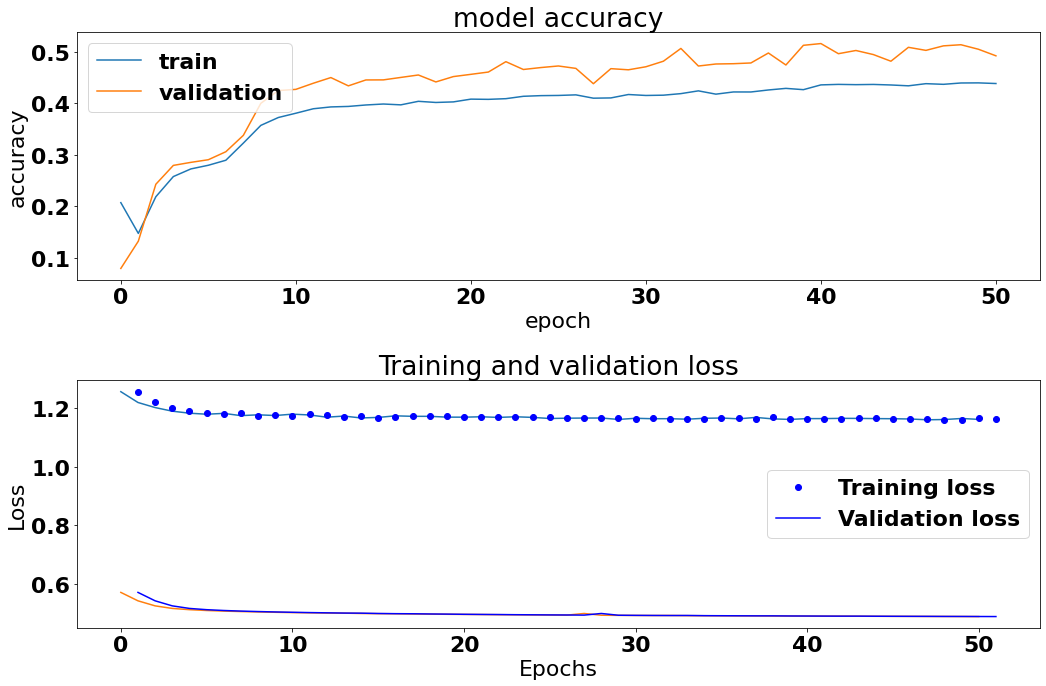

In [76]:
plot_accuracy(history)
plot_training_nad_val_loss(history)
# plot_train_and_val_accuracy(history)

# y_pred = report(history.model, features_test, labels_test)

# plot_heatmap(class_names, y_pred, labels_test)

TRAINING USING TWO LABELS

Train model using two labels(lying down and sleeping)

In [77]:
def design_model(learning_rate):

    model = models.Sequential()
#     # Set the input layer:
    model.add(InputLayer(input_shape = (features_train_scaled2.shape[1],)))
    
    
    
#     model.add(layers.Dense(10000, activation='relu', input_shape=features_train_scaled.shape[1],))
    model.add(Dense(64, activation = "relu"))
    model.add(Dense(64, activation = "relu"))
    model.add(Dense(46, activation = "relu"))
    model.add(layers.Dense(2, activation='softmax'))

    model.add(Dropout(0.2))
    model.compile(loss = "binary_crossentropy", #tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
                  optimizer = 'sgd',
                  metrics = ['accuracy'])

    model.summary()
    return model

history, features_test, labels_test = fit_model(learning_rate, num_epochs,
                                                batch_size,features_train_scaled2,labels_train2,features_test_scaled2,labels_test2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                5824      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 46)                2990      
                                                                 
 dense_7 (Dense)             (None, 2)                 94        
                                                                 
 dropout_1 (Dropout)         (None, 2)                 0         
                                                                 
Total params: 13,068
Trainable params: 13,068
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
380/380 [=============================

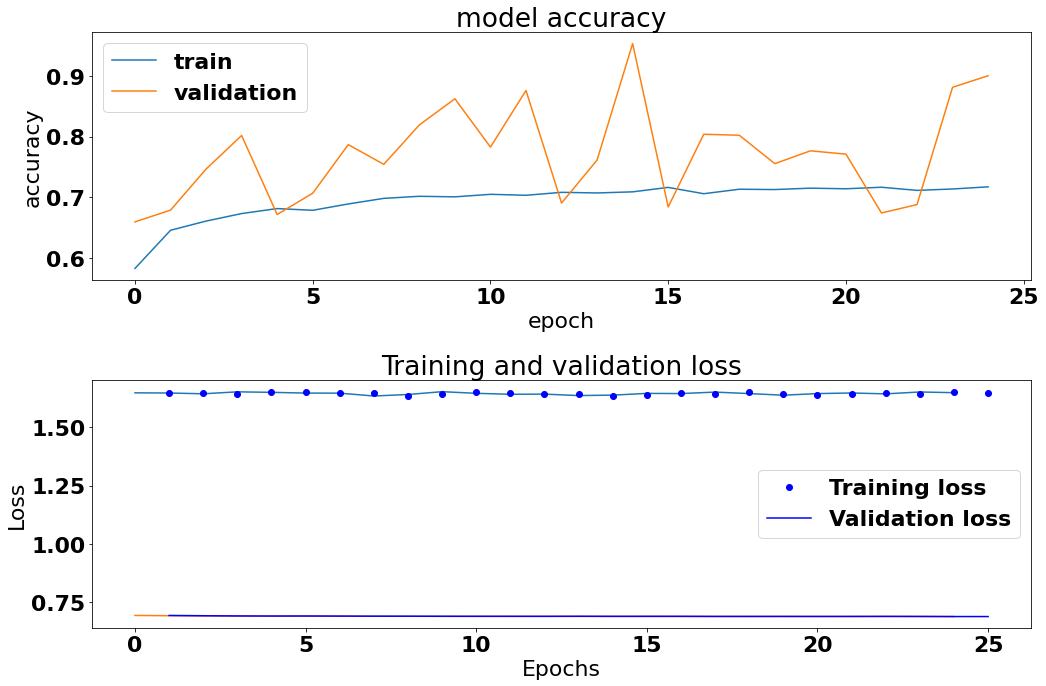

In [78]:
plot_accuracy(history)
plot_training_nad_val_loss(history)

Train model with two labels(lying down and sitting). All two labels will have 2 units in the fourth layer because it outputs two labels

In [79]:
def design_model(learning_rate):

    model = models.Sequential()
#     # Set the input layer:
    model.add(InputLayer(input_shape = (features_train_scaled3.shape[1],)))
    
    
    
#     model.add(layers.Dense(10000, activation='relu', input_shape=features_train_scaled.shape[1],))
    model.add(Dense(64, activation = "relu"))
    model.add(Dense(64, activation = "relu"))
    model.add(Dense(46, activation = "relu"))
    model.add(layers.Dense(2, activation='softmax'))

    model.add(Dropout(0.2))
    model.compile(loss = "binary_crossentropy", #tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
                  optimizer = 'sgd',
                  metrics = ['accuracy'])

    model.summary()
    return model

history, features_test, labels_test = fit_model(learning_rate, num_epochs,
                                                batch_size,features_train_scaled3,labels_train3,features_test_scaled3,labels_test3)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                7104      
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 46)                2990      
                                                                 
 dense_11 (Dense)            (None, 2)                 94        
                                                                 
 dropout_2 (Dropout)         (None, 2)                 0         
                                                                 
Total params: 14,348
Trainable params: 14,348
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
380/380 [=============================

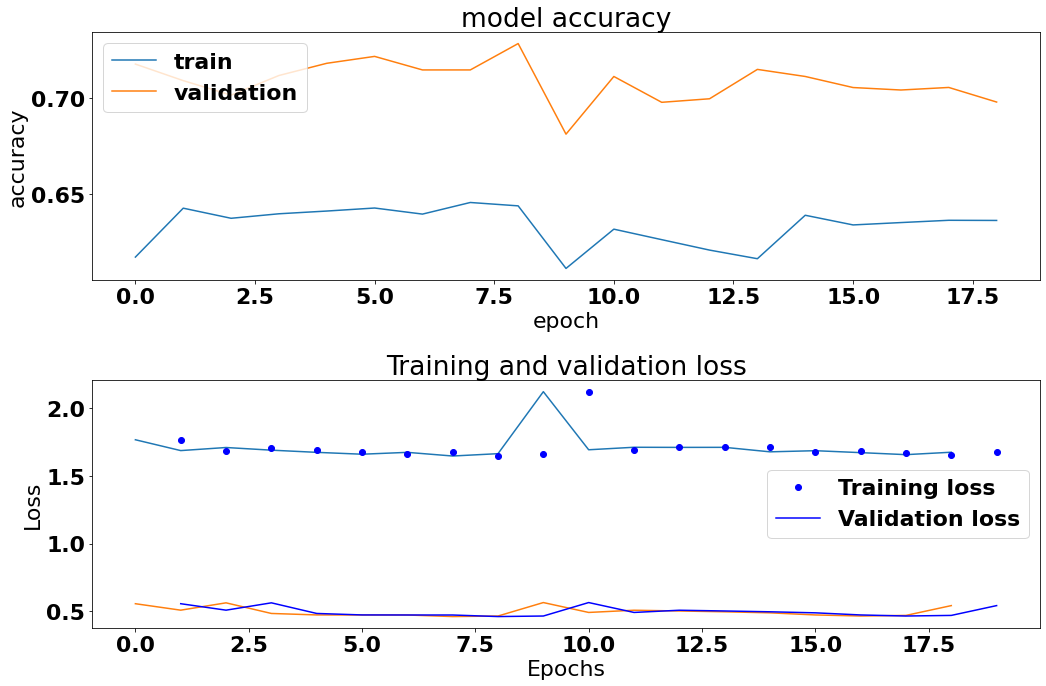

In [80]:
plot_accuracy(history)
plot_training_nad_val_loss(history)

Comparing the modles with two labels, it can be observed that losses for model with lying down and sleeping labels(positive correlated labes) have low losses compared to model with lying down and sitting labels(negatively correlated labels). So it may be better to use only models which positively correlate with each other during multilabel classification

Training model with one label(lying down)

Here, instead of softmax ,sigmoid will be used as the activation function for the 4th layer since it suits, single labels. Also it will have 1 unit.

In [81]:
def design_model(learning_rate):

    model = models.Sequential()
#     # Set the input layer:
    model.add(InputLayer(input_shape = (features_train_scaled3.shape[1],)))
    
    
    
#     model.add(layers.Dense(10000, activation='relu', input_shape=features_train_scaled.shape[1],))
    model.add(Dense(64, activation = "relu"))
    model.add(Dense(64, activation = "relu"))
    model.add(Dense(46, activation = "relu"))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.add(Dropout(0.2))
    model.compile(loss = "binary_crossentropy", #tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
                  optimizer = 'sgd',
                  metrics = ['accuracy'])

    model.summary()
    return model

history, features_test, labels_test = fit_model(learning_rate, num_epochs,
                                                batch_size,features_train_scaled3,labels_train3,features_test_scaled3,labels_test3)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                7104      
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 46)                2990      
                                                                 
 dense_15 (Dense)            (None, 1)                 47        
                                                                 
 dropout_3 (Dropout)         (None, 1)                 0         
                                                                 
Total params: 14,301
Trainable params: 14,301
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
380/380 [=============================

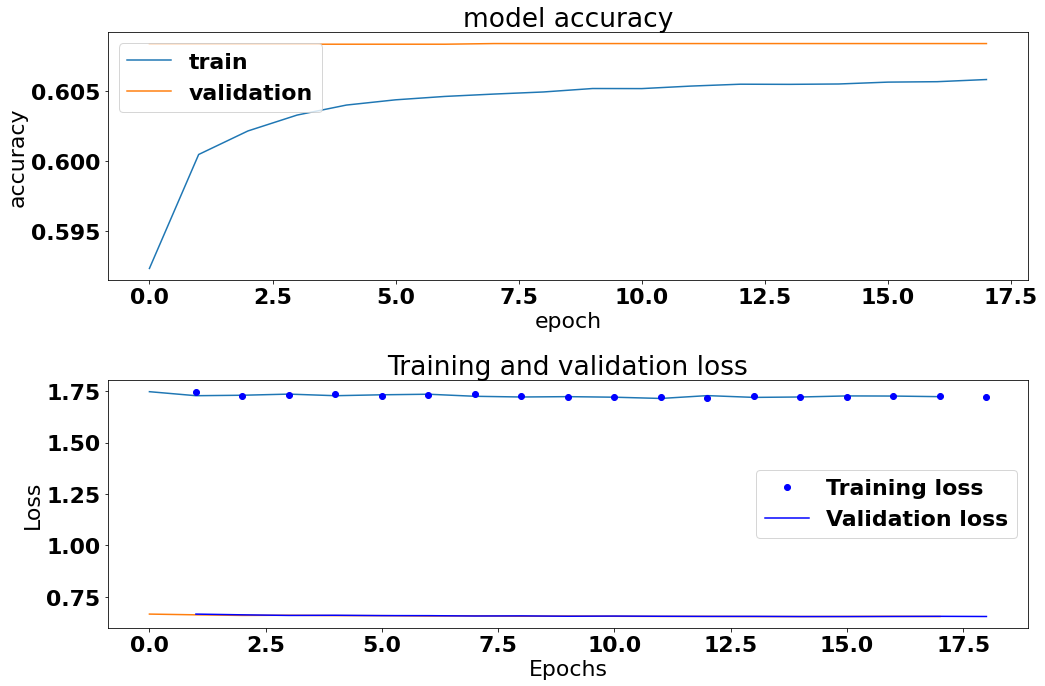

In [82]:
plot_accuracy(history)
plot_training_nad_val_loss(history)

## FURTHER ACTIONS

Apart from the model which was trained with seven labels, then remainder of the models did fairly well(accuracy of approximately 0.6. The following actions will be considered to enhance model learning
1. Tuning hyperparameters and using the right combinations 
2. further reduction of features for training models with seven(7) labels
3. Exploring other suitable machine learning algorithms that can provide optimum model performance

